In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('data_cleaned.csv')

/var/folders/tx/ccgvwwd562sfhw5ybj094vxc0000gn/T/ipykernel_17173/4264258221.py:1: DtypeWarning: Columns (14,28,37,38) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('data_cleaned.csv')


In [3]:
data.head()

,Unnamed: 0,index_row,id,program_name,description,org_name,category_name,capacity,min_age,max_age,...,wed_end_time,wed_start_time,program_price,geographic_cluster_name,program_pays_participants,program_has_scholarships,program_provides_transportation,latitude,longitude,program_provides_free_food
0,0,"4,568",78752,BBBS Community Based Mentoring (Year Round),Community Based Mentoring is the traditional B...,Big Brothers Big Sisters,academic_support,2000.0,7,15,...,NaN,NaN,Free,NEAR WEST SIDE,Not Paid,YES,YES,41.886002,-87.642403,False
1,1,"4,569",78752,BBBS Community Based Mentoring (Year Round),Community Based Mentoring is the traditional B...,Big Brothers Big Sisters,work_career,2000.0,7,15,...,NaN,NaN,Free,NEAR WEST SIDE,Not Paid,YES,YES,41.886002,-87.642403,False
2,2,"4,562",78749,Youth Mentoring and Academic Supports,Young Men's Educational Network provides mento...,Youth Mentoring and Academic Supports,academic_support,100.0,12,18,...,NaN,NaN,Free,NORTH LAWNDALE,Not Paid,NO,NO,41.864799,-87.724800,True
3,3,"4,563",78749,Youth Mentoring and Academic Supports,Young Men's Educational Network provides mento...,Youth Mentoring and Academic Supports,music_art,100.0,12,18,...,NaN,NaN,Free,NORTH LAWNDALE,Not Paid,NO,NO,41.864799,-87.724800,True
4,4,"4,557",78746,Refugee Youth Career Pathways,Refugee Youth Career Pathways (RYCP) provides ...,RefugeeOne,managing_money,15.0,16,24,...,NaN,NaN,Free,NaN,Not Paid,YES,YES,NaN,NaN,False


In [9]:
data.category_name.value_counts()

sports_wellness           41675
music_art                 16700
reading_writing            5318
academic_support           2014
nature                     1639
science                    1078
building_fixing_things     1059
computers                   773
healthcare                  527
helping_your_community      462
performance                 448
food                        377
managing_money              235
work_career                 218
social_studies              116
digital_media                88
customerhuman_service        29
math                         13
transportation               12
teaching                      5
law                           2
Name: category_name, dtype: int64

In [20]:
focus_clusters = ['AUSTIN', 'NORTH LAWNDALE', 'HUMBOLDT PARK', 'EAST GARFIELD PARK', 
                  'ENGLEWOOD', 'AUBURN GRESHAM', 'WEST GARFIELD PARK', 'ROSELAND', 
                  'GREATER GRAND CROSSING', 'WEST ENGLEWOOD', 'SOUTH SHORE', 'CHICAGO LAWN', 
                  'WEST PULLMAN']

Austin

North Lawndale

Humboldt Park

East Garfield Park

Englewood

Auburn Gresham

West Garfield Park

Roseland

Greater Grand Crossing

West Englewood

South Shore

New City (not in dataset)

Chicago Lawn

South Lawndale

West Pullman (not in dataset)

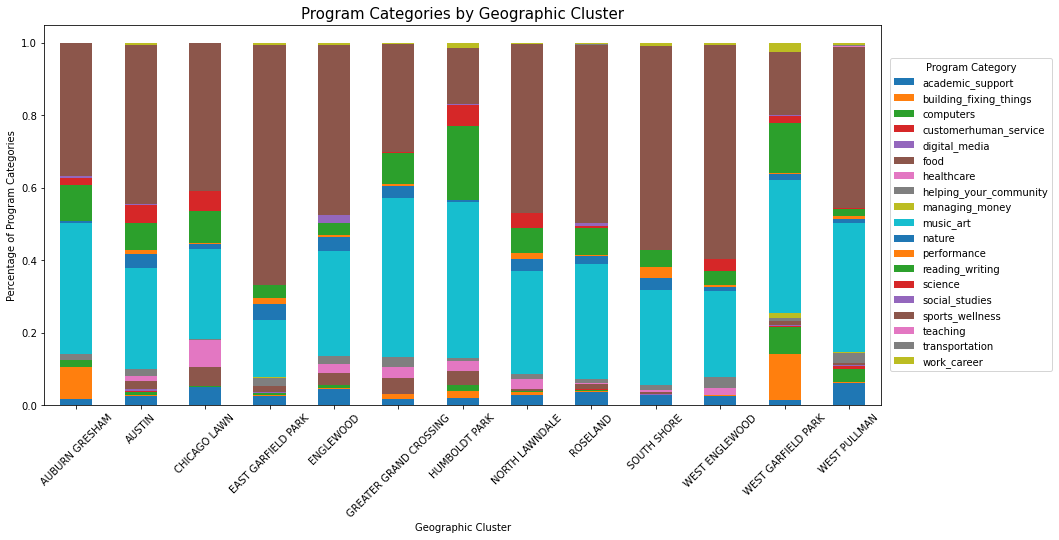

In [75]:
# Filter the data to only include the clusters "A" and "B"
filtered_data = data[data["geographic_cluster_name"].isin(focus_clusters)]

# Group the filtered data by `geographic_cluster_name` and `category_name`, and count the number of occurrences
grouped = filtered_data.groupby(["geographic_cluster_name", "category_name"]).size().reset_index(name="count")

# Pivot the data to create a table with `geographic_cluster_name` as rows, `category_name` as columns, and the count as values
pivot_table = grouped.pivot(index="geographic_cluster_name", columns="category_name", values="count").fillna(0)

# Calculate the percentage of each `category_name` in each `geographic_cluster_name`
category_percents = pivot_table.apply(lambda x: x / x.sum(), axis=1)

# Create a stacked bar chart
ax = category_percents.plot(kind="bar", stacked=True, figsize=(15,7))

ax.legend(loc='upper left', bbox_to_anchor=(1.0, 1.0))
ax.set_title('Program Categories by Geographic Cluster', size=15)
ax.legend(title="Program Category", loc='center left', bbox_to_anchor=(1.005, 0.5))

# Set the x-axis label
plt.xlabel("Geographic Cluster")
plt.xticks(rotation=45)

# Set the y-axis label
plt.ylabel("Percentage of Program Categories")

# Show the plot
plt.show()

In [46]:
for name, group in data.groupby('geographic_cluster_name'):
    if name in focus_clusters:
        category_counts = group['category_name'].value_counts()
        top_categories = category_counts.nlargest(3).index.tolist()
        print(f"Top 3 categories in {name}: {', '.join(top_categories)}")

Top 3 categories in AUBURN GRESHAM: sports_wellness, music_art, reading_writing
Top 3 categories in AUSTIN: sports_wellness, music_art, reading_writing
Top 3 categories in CHICAGO LAWN: sports_wellness, music_art, reading_writing
Top 3 categories in EAST GARFIELD PARK: sports_wellness, music_art, nature
Top 3 categories in ENGLEWOOD: sports_wellness, music_art, academic_support
Top 3 categories in GREATER GRAND CROSSING: music_art, sports_wellness, reading_writing
Top 3 categories in HUMBOLDT PARK: music_art, reading_writing, sports_wellness
Top 3 categories in NORTH LAWNDALE: sports_wellness, music_art, reading_writing
Top 3 categories in ROSELAND: sports_wellness, music_art, reading_writing
Top 3 categories in SOUTH SHORE: sports_wellness, music_art, reading_writing
Top 3 categories in WEST ENGLEWOOD: sports_wellness, music_art, reading_writing
Top 3 categories in WEST GARFIELD PARK: music_art, sports_wellness, reading_writing
Top 3 categories in WEST PULLMAN: sports_wellness, music_

## Spacer - below is not useful

In [17]:
#grouped = data.groupby('geographic_cluster_name')

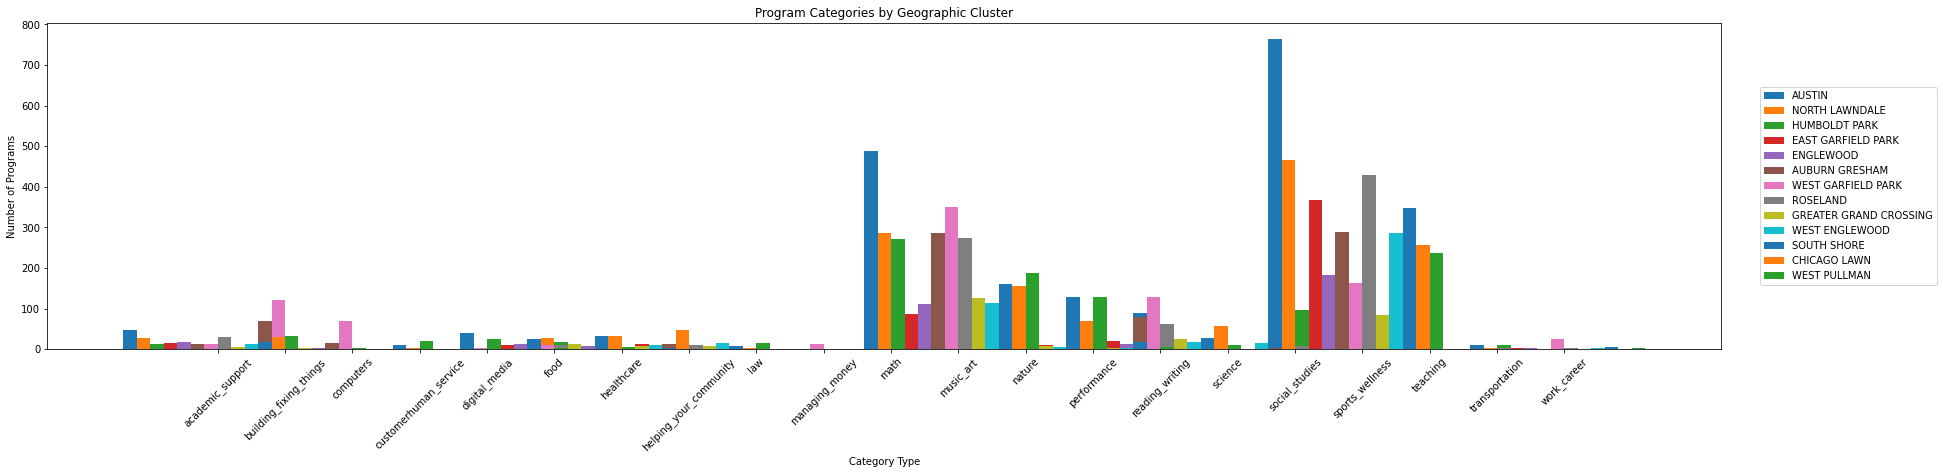

In [45]:
# Calculate the number of programs in each category for each geographic cluster
category_counts = data.groupby(['category_name', 'geographic_cluster_name']).size().unstack()

# Create a figure and axis object
fig, ax = plt.subplots(figsize=(30, 6))

# Define the x-axis labels and positions
categories = category_counts.index
x_pos = np.arange(len(categories))

# Define the width of each bar
bar_width = 0.2

# Loop through each geographic cluster and plot a group of bars
for i, cluster in enumerate(focus_clusters):
    values = category_counts[cluster].values
    ax.bar(x_pos + (i * bar_width), values, bar_width, label=cluster)

# Set the chart title and axis labels
ax.set_title('Program Categories by Geographic Cluster')
ax.set_xlabel('Category Type')
ax.set_ylabel('Number of Programs')

# Set the x-axis ticks and labels
ax.set_xticks(x_pos + (bar_width * len(focus_clusters) / 2))
ax.set_xticklabels(categories, rotation=45)

# Add a legend
ax.legend(bbox_to_anchor=(1.02, 0.5), loc='center left')

# Display the chart
plt.show()

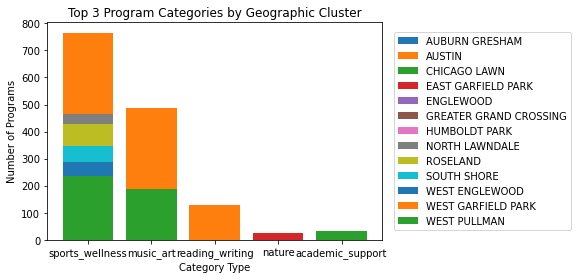

In [28]:
# Create a figure and axis object
fig, ax = plt.subplots()

# Loop through each group and plot a bar chart
for name, group in data.groupby('geographic_cluster_name'):
    if name in focus_clusters:
        category_counts = group['category_name'].value_counts().nlargest(3)
        ax.bar(category_counts.index, category_counts.values, label=name)

# Set the chart title and axis labels
ax.set_title('Top 3 Program Categories by Geographic Cluster')
ax.set_xlabel('Category Type')
ax.set_ylabel('Number of Programs')


# Add a legend
ax.legend(bbox_to_anchor=(1.02, 0.5), loc='center left')

# Display the chart
plt.show()

In [54]:
focus_clusters

['AUSTIN',
 'NORTH LAWNDALE',
 'HUMBOLDT PARK',
 'EAST GARFIELD PARK',
 'ENGLEWOOD',
 'AUBURN GRESHAM',
 'WEST GARFIELD PARK',
 'ROSELAND',
 'GREATER GRAND CROSSING',
 'WEST ENGLEWOOD',
 'SOUTH SHORE',
 'CHICAGO LAWN',
 'WEST PULLMAN']

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


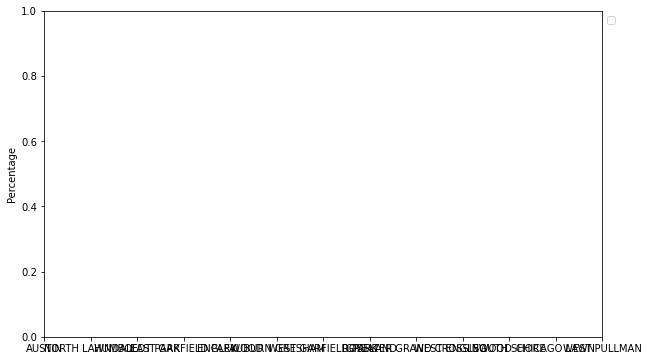

In [53]:
data_focus = data[data['geographic_cluster_name'].isin(focus_clusters)]

# Compute the category counts for each geographic cluster
category_counts = (data_focus.groupby(['geographic_cluster_name', 'category_name'])
                   .size()
                   .unstack(fill_value=0)
                   .apply(lambda x: x / x.sum(), axis=1))

# Set up the figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Set up the x-axis ticks and labels
x_pos = np.arange(len(focus_clusters))
ax.set_xticks(x_pos)
ax.set_xticklabels(focus_clusters)

# Set up the y-axis label
ax.set_ylabel('Percentage')

# Plot the stacked bars for each geographic cluster
for i, category in enumerate(category_counts.columns):
    if category in focus_clusters:
        bottom = np.cumsum(category_counts.shift(axis=1).iloc[:, i-1:i].fillna(0), axis=1).iloc[:, -1].values
        values = category_counts[category].values
        ax.bar(x_pos, values, bottom=bottom, label=category)

# Set up the legend outside of the graph
ax.legend(loc='upper left', bbox_to_anchor=(1.0, 1.0))

# Show the plot
plt.show()
